<a href="https://colab.research.google.com/github/bhavya-02/hello-world/blob/master/Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
df_english.head()

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
df_french.head()

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df=pd.concat([df_english,df_french],axis=1)

In [ ]:
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
 1   french   137860 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [ ]:
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
df.tail()

,english,french
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."
137859,"the orange is her favorite fruit , but the ban...","l'orange est son fruit préféré , mais la banan..."


In [ ]:
print("total_english_word=",end=" ") 
print(len(df['english']))
print("total_french_word=",end=" ") 
print(len(df['french']))

total_english_word= 137860
total_french_word= 137860


**data cleaning **

In [ ]:
def remove_punc(x):
    return re.sub('[!#?,.:";]','',x)

In [ ]:
df['english']=df['english'].apply(remove_punc)
df['french']=df['french'].apply(remove_punc)

In [ ]:
df

,english,french
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,california is usually quiet during march and ...,california est généralement calme en mars et ...
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...
...,...,...
137855,france is never busy during march and it is s...,la france est jamais occupée en mars et il es...
137856,india is sometimes beautiful during spring an...,l' inde est parfois belle au printemps et il ...
137857,india is never wet during summer but it is so...,l' inde est jamais mouillé pendant l' été mai...
137858,france is never chilly during january but it ...,la france est jamais froid en janvier mais il...


In [ ]:
english_word=[]
french_word=[]

def get_uniqe_words(x,wordlist):
    for word in x.split():
        if word not in wordlist:
            wordlist.append(word)

In [ ]:
df['english'].apply(lambda x: get_uniqe_words(x,english_word))
df['french'].apply(lambda x: get_uniqe_words(x,french_word))



0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [ ]:
english_word

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'they',
 'pears',
 'she',
 'little',
 'red',

In [ ]:
french_word

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 "l'orange",
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 "l'automne",
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'm

In [ ]:
total_french_word=len(french_word)
total_english_word=len(english_word)

In [ ]:
total_french_word

350

In [ ]:
total_english_word

199

**visualizaton of clean up data set**

In [ ]:
words=[]
for i in df['english']:
    for j in i.split():
        words.append(j)

In [ ]:
english_word_count=Counter(words)

In [ ]:
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [ ]:
english_word_count

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [ ]:
english_word_count_sorted=sorted(english_word_count.items(),key=operator.itemgetter(1),reverse=True)
english_word_count_sorted

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [ ]:
english_words=[]
english_count=[]

In [ ]:
for i in range(len(english_word_count_sorted)):
    english_words.append(english_word_count_sorted[i][0])
    english_count.append(english_word_count_sorted[i][1])
    

In [ ]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [ ]:
english_count

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [ ]:
fig=px.bar(x=english_words,y=english_count)
fig.show()

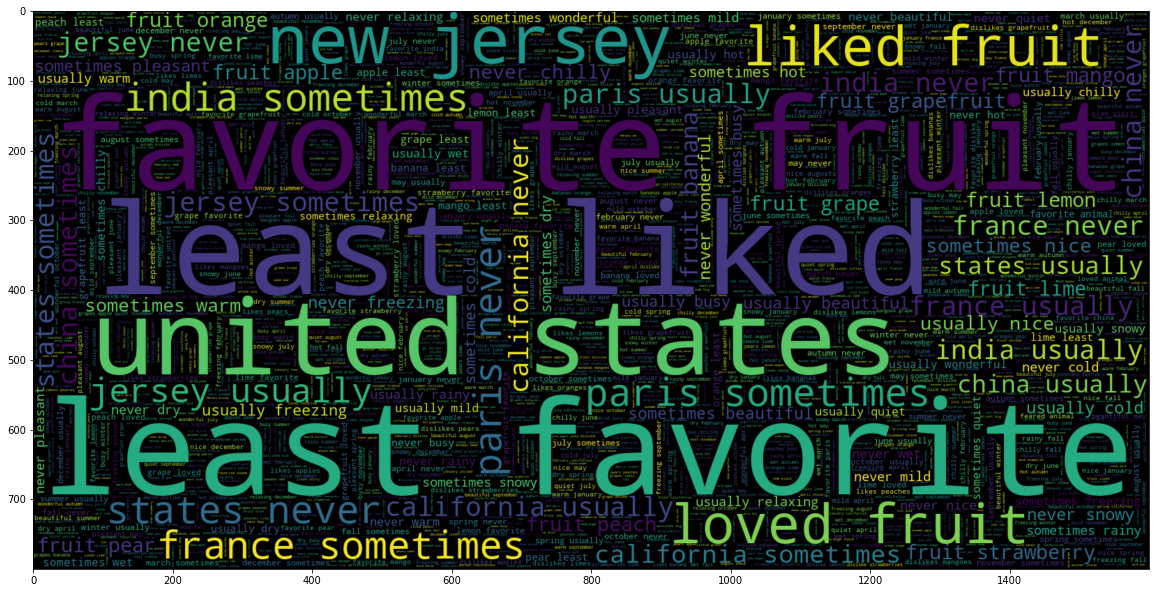

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words = 2000, width=1600, height= 800).generate(" ".join(df.english))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
df.english[0]

'new jersey is sometimes quiet during autumn  and it is snowy in april '

In [ ]:
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:
max_len_english=-1
for doc in df.english:
    tokens=nltk.word_tokenize(doc)
    if(max_len_english<len(tokens)):
        max_len_english=len(tokens)

In [ ]:
max_len_english

15

In [ ]:
words_french=[]
for i in df['french']:
    for j in i.split():
        words_french.append(j)

In [ ]:
french_word_count=Counter(words_french)

In [ ]:
words_french

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [ ]:
french_word_count

Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [ ]:
french_word_count_sorted=sorted(french_word_count.items(),key=operator.itemgetter(1),reverse=True)
french_word_count_sorted

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [ ]:
french_words=[]
french_count=[]

In [ ]:
for i in range(len(french_word_count_sorted)):
    french_words.append(french_word_count_sorted[i][0])
    french_count.append(french_word_count_sorted[i][1])
        

In [ ]:
french_words

['est',
 'en',
 'il',
 'les',
 'mais',
 'et',
 'la',
 'parfois',
 'jamais',
 'le',
 "l'",
 'généralement',
 'moins',
 'aimé',
 'au',
 'fruit',
 'préféré',
 'agréable',
 'froid',
 'son',
 'chaud',
 'de',
 'plus',
 'automne',
 'mois',
 'à',
 'elle',
 'citrons',
 'paris',
 'inde',
 'états-unis',
 'france',
 'jersey',
 'new',
 'chine',
 'pendant',
 'pamplemousse',
 'mon',
 'votre',
 'juin',
 'printemps',
 'janvier',
 'hiver',
 'mars',
 'été',
 'mai',
 'septembre',
 'juillet',
 'avril',
 'novembre',
 'décembre',
 'février',
 'octobre',
 'aime',
 'août',
 'merveilleux',
 'relaxant',
 'doux',
 'humide',
 'notre',
 'californie',
 'sec',
 'leur',
 'occupé',
 'pluvieux',
 'calme',
 'beau',
 'habituellement',
 'pommes',
 'pêches',
 'oranges',
 'poires',
 'fraises',
 'bananes',
 'verts',
 'raisins',
 'mangues',
 "d'",
 'mangue',
 'gel',
 'raisin',
 'pomme',
 "l'orange",
 'citron',
 'chaux',
 'banane',
 'poire',
 'fraise',
 'pêche',
 'pas',
 'enneigée',
 'favori',
 'déteste',
 'gèle',
 'fruits',
 '

In [ ]:
french_count

[196809,
 105768,
 84079,
 65255,
 63987,
 59851,
 49861,
 37746,
 37215,
 35306,
 32917,
 31292,
 27557,
 25852,
 25738,
 23626,
 23305,
 17751,
 16794,
 16496,
 16405,
 15070,
 14934,
 14727,
 14350,
 13870,
 12056,
 11679,
 11334,
 11277,
 11210,
 11170,
 11052,
 11047,
 10936,
 10741,
 10140,
 9403,
 9368,
 9133,
 9100,
 9090,
 9038,
 9023,
 8999,
 8995,
 8958,
 8956,
 8954,
 8951,
 8945,
 8942,
 8911,
 8870,
 8789,
 8704,
 8458,
 8458,
 8446,
 8319,
 8189,
 7957,
 7855,
 7782,
 7658,
 7256,
 6387,
 6215,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5835,
 5780,
 5774,
 5100,
 4899,
 4886,
 4852,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4495,
 4008,
 3857,
 3743,
 3622,
 3566,
 3510,
 3411,
 3185,
 3131,
 3061,
 3016,
 2916,
 2726,
 2715,
 2520,
 2517,
 2435,
 2248,
 1944,
 1927,
 1867,
 1706,
 1666,
 1548,
 1465,
 1437,
 1356,
 1308,
 1278,
 1239,
 1198,
 1180,
 1124,
 1116,
 1111,
 1111,
 1094,
 1072,
 1053,
 1018,
 1001,
 972,
 972,
 966,
 908,
 837,
 836,
 834,
 7

In [ ]:
fig=px.bar(x=french_words,y=french_count)
fig.show()

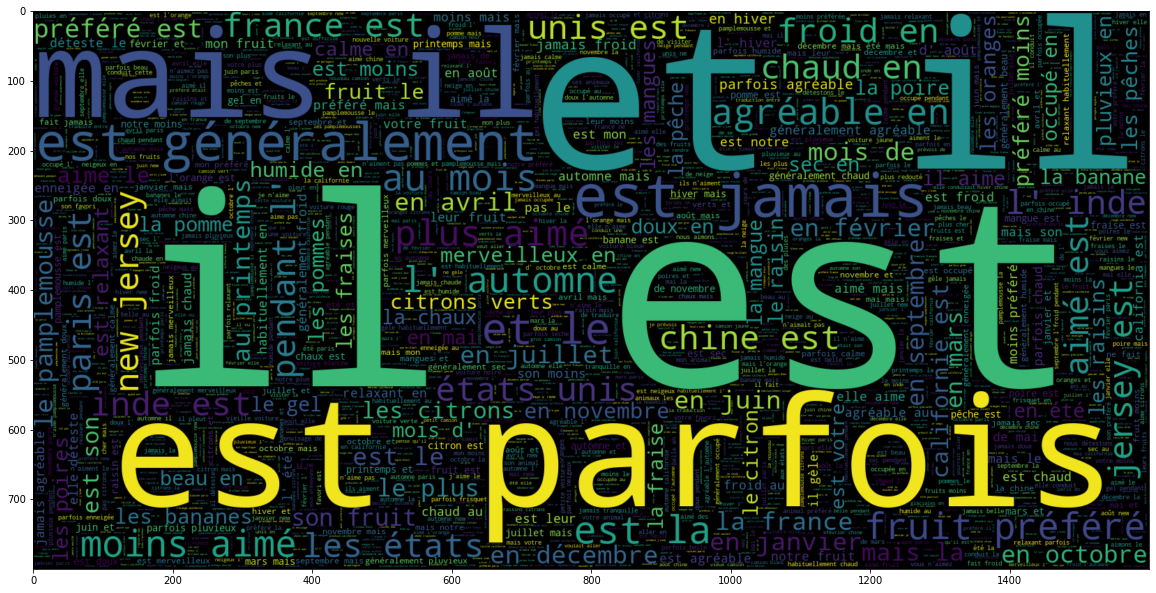

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words = 2000, width=1600, height= 800).generate(" ".join(df.french))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
df.french[0]

"new jersey est parfois calme pendant l' automne  et il est neigeux en avril "

In [ ]:
nltk.word_tokenize(df.french[0])

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 "'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril']

In [ ]:
max_len_french=-1
for doc in df.french:
    tokens=nltk.word_tokenize(doc)
    if(max_len_french<len(tokens)):
        max_len_french=len(tokens)

In [ ]:
max_len_french

23

**prepare the data by performing tokenization and padding**

In [ ]:
def tokenize_and_pad(x,maxlen):
    tokenizer=Tokenizer(char_level=False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen= maxlen, padding= 'post')
    return tokenizer,sequences,padded

In [ ]:
x_tokenizer, x_sequences,x_padded=tokenize_and_pad(df.english,max(max_len_english,max_len_french))
y_tokenizer, y_sequences,y_padded=tokenize_and_pad(df.french,max(max_len_english,max_len_french))

In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_word + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_word + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [ ]:
print(df.english[-1:].item())
print(x_padded[-1:])

the orange is her favorite fruit  but the banana is your favorite 
[[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print(df.french[-1:].item())
print(y_padded[-1:])

l'orange est son fruit préféré  mais la banane est votre favori 
[[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_padded,y_padded,test_size=0.1)

In [ ]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = max_len_english,mask_zero=True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(max_len_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 393s 4s/step - loss: 2.7012 - accuracy: 0.4976 - val_loss: 2.1120 - val_accuracy: 0.5433
Epoch 2/10
110/110 [==============================] - 385s 4s/step - loss: 1.8417 - accuracy: 0.5742 - val_loss: 1.6262 - val_accuracy: 0.6013
Epoch 3/10
110/110 [==============================] - 391s 4s/step - loss: 1.5146 - accuracy: 0.6158 - val_loss: 1.4160 - val_accuracy: 0.6349
Epoch 4/10
110/110 [==============================] - 387s 4s/step - loss: 1.3118 - accuracy: 0.6483 - val_loss: 1.2373 - val_accuracy: 0.6583
Epoch 5/10
110/110 [==============================] - 387s 4s/step - loss: 1.1393 - accuracy: 0.6828 - val_loss: 1.0797 - val_accuracy: 0.6930
Epoch 6/10
110/110 [==============================] - 386s 4s/step - loss: 0.9984 - accuracy: 0.7157 - val_loss: 0.9319 - val_accuracy: 0.7345
Epoch 7/10
110/110 [==============================] - 388s 4s/step - loss: 0.8834 - accuracy: 0.7461 - val_loss: 0.8654 - val_accuracy: 0.7485

In [ ]:
# save the model
model.save("weights.h5")

ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
x_test.shape

(13786, 23)

In [ ]:
x_test

array([[  5,  82,   1, ...,   0,   0,   0],
       [150, 196,  27, ...,   0,   0,   0],
       [ 26,  69,  72, ...,   0,   0,   0],
       ...,
       [ 26, 138,   3, ...,   0,   0,   0],
       [ 19,   1,   9, ...,   0,   0,   0],
       [  5,  83,   1, ...,   0,   0,   0]], dtype=int32)

In [ ]:
x_test[0]

array([ 5, 82,  1, 29, 14, 15, 13,  6,  5, 84,  1, 50, 14, 15,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

array([[[4.45356875e-07, 4.47062048e-05, 5.62728104e-08, ...,
         1.05993607e-07, 5.49956809e-08, 8.33144256e-08],
        [1.38131810e-07, 2.65902225e-02, 1.73617600e-08, ...,
         1.78653163e-08, 6.07440453e-09, 1.44850327e-08],
        [1.89692297e-08, 9.58830893e-01, 1.37240885e-08, ...,
         1.30795841e-09, 6.22672081e-10, 1.45766987e-09],
        ...,
        [9.99620914e-01, 1.23242080e-05, 1.27406201e-05, ...,
         6.80627776e-11, 8.81439782e-11, 3.50534254e-11],
        [9.99627709e-01, 1.20269224e-05, 1.28527745e-05, ...,
         6.73099354e-11, 8.74434483e-11, 3.43499743e-11],
        [9.99628901e-01, 1.20190598e-05, 1.28341471e-05, ...,
         6.70784261e-11, 8.71398648e-11, 3.41196446e-11]],

       [[2.20630667e-04, 2.08117114e-03, 3.21729691e-04, ...,
         2.01675459e-04, 2.16852044e-04, 2.37313434e-04],
        [1.08040076e-04, 2.42433138e-03, 4.89180849e-04, ...,
         8.17452965e-05, 1.13907125e-04, 1.25486185e-04],
        [1.80582691e-04, 

In [ ]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [ ]:
def pad_to_text(padded,tokenizer):
  id_to_word= {id:word for word, id in tokenizer.word_index.items()}
  id_to_word[0]=''
  return ' '.join([id_to_word[j] for j in padded])


In [ ]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the grape is your most loved fruit but the orange is their most loved         

Original French word - le raisin est votre fruit le plus aimé mais l'orange est leur plus aimé         

Predicted French word - le raisin est leur fruit le plus aimé mais le est est plus plus         




Original English word - why isn't she going to paris                 

Original French word - pourquoi est ce pas aller à paris                

Predicted French word - pourquoi pourquoi pas pas pas la la                




Original English word - he dislikes lemons strawberries and oranges                 

Original French word - il déteste les citrons les fraises et les oranges              

Predicted French word - il déteste les poires les et et les oranges              




Original English word - france is sometimes hot during autumn and it is freezing in april           

Original French word - la france est parfois chaud pendant l' automne et il gèle en avril          

Pr

**Yup I am done**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')